In [31]:
%load_ext autoreload
%autoreload 2

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import json
import numpy as onp
import jax
import jax.numpy as jnp
import flax
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch
import matplotlib
import timecast as tc

from mpl_toolkits import mplot3d


plt.rcParams['figure.figsize'] = [20, 10]

import tqdm.notebook as tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from timecast.learners._ar import _ar_gram
from timecast.learners._pcr import _compute_pca_projection

In [33]:
basins = pickle.load(open("../data/basins.p", "rb"))

def generator():
    for basin in basins:
        X = pickle.load(open("../data/train/{}.p".format(basin), "rb"))
        ealstm = pickle.load(open("../data/ealstm/{}.p".format(basin), "rb"))
        Y = onp.zeros((X.shape[0], 1))
        Y[-ealstm.shape[0]:, :] = ealstm[["qobs"]]
        yield X[:, :5], Y, None
            
XTX, XTY = _ar_gram(generator(), input_dim=5, output_dim=1, history_len=270)

In [34]:
projections = {}
for k in tqdm.tqdm([10]):
    projections[k] = _compute_pca_projection(XTX.matrix(normalize=True), k)

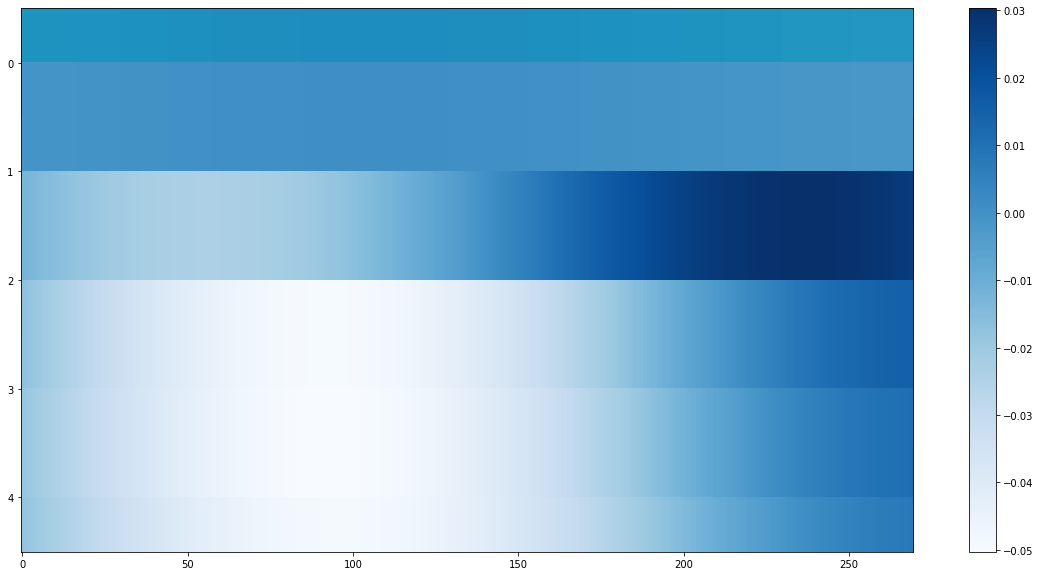

In [35]:
plt.rcParams['figure.figsize'] = [20, 10]
data = projections[10][:,0].reshape(270, 5).T

fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues) 
plt.imshow(data, cmap="YlGnBu", aspect="auto")
plt.colorbar(heatmap)

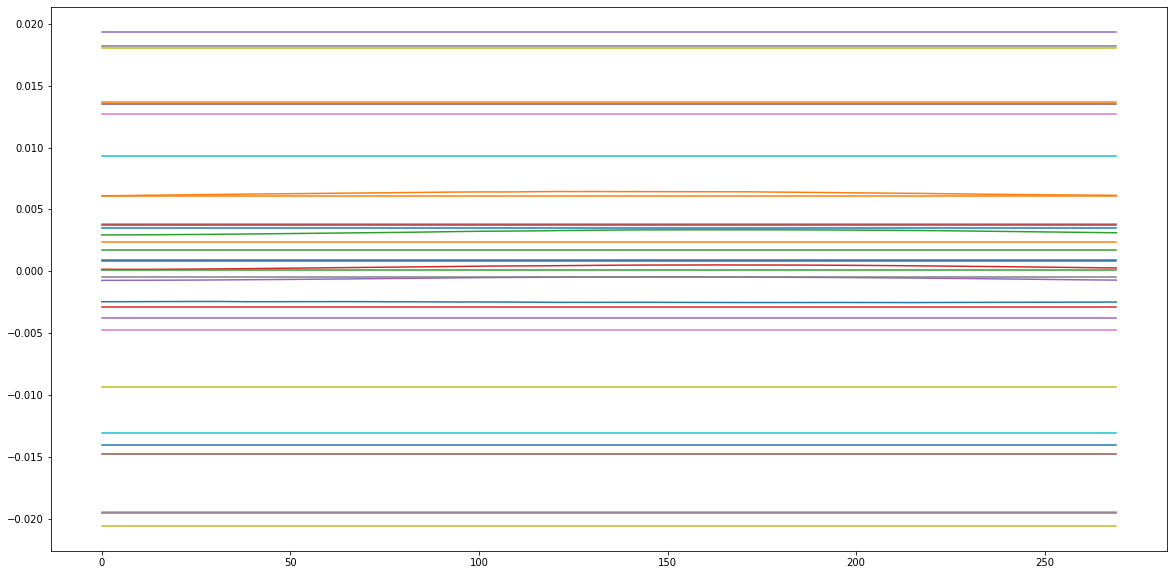

In [27]:
plt.rcParams['figure.figsize'] = [20, 10]
data = projections[10][:,0].reshape(270, 32)

fig, ax = plt.subplots()
plt.plot(data)

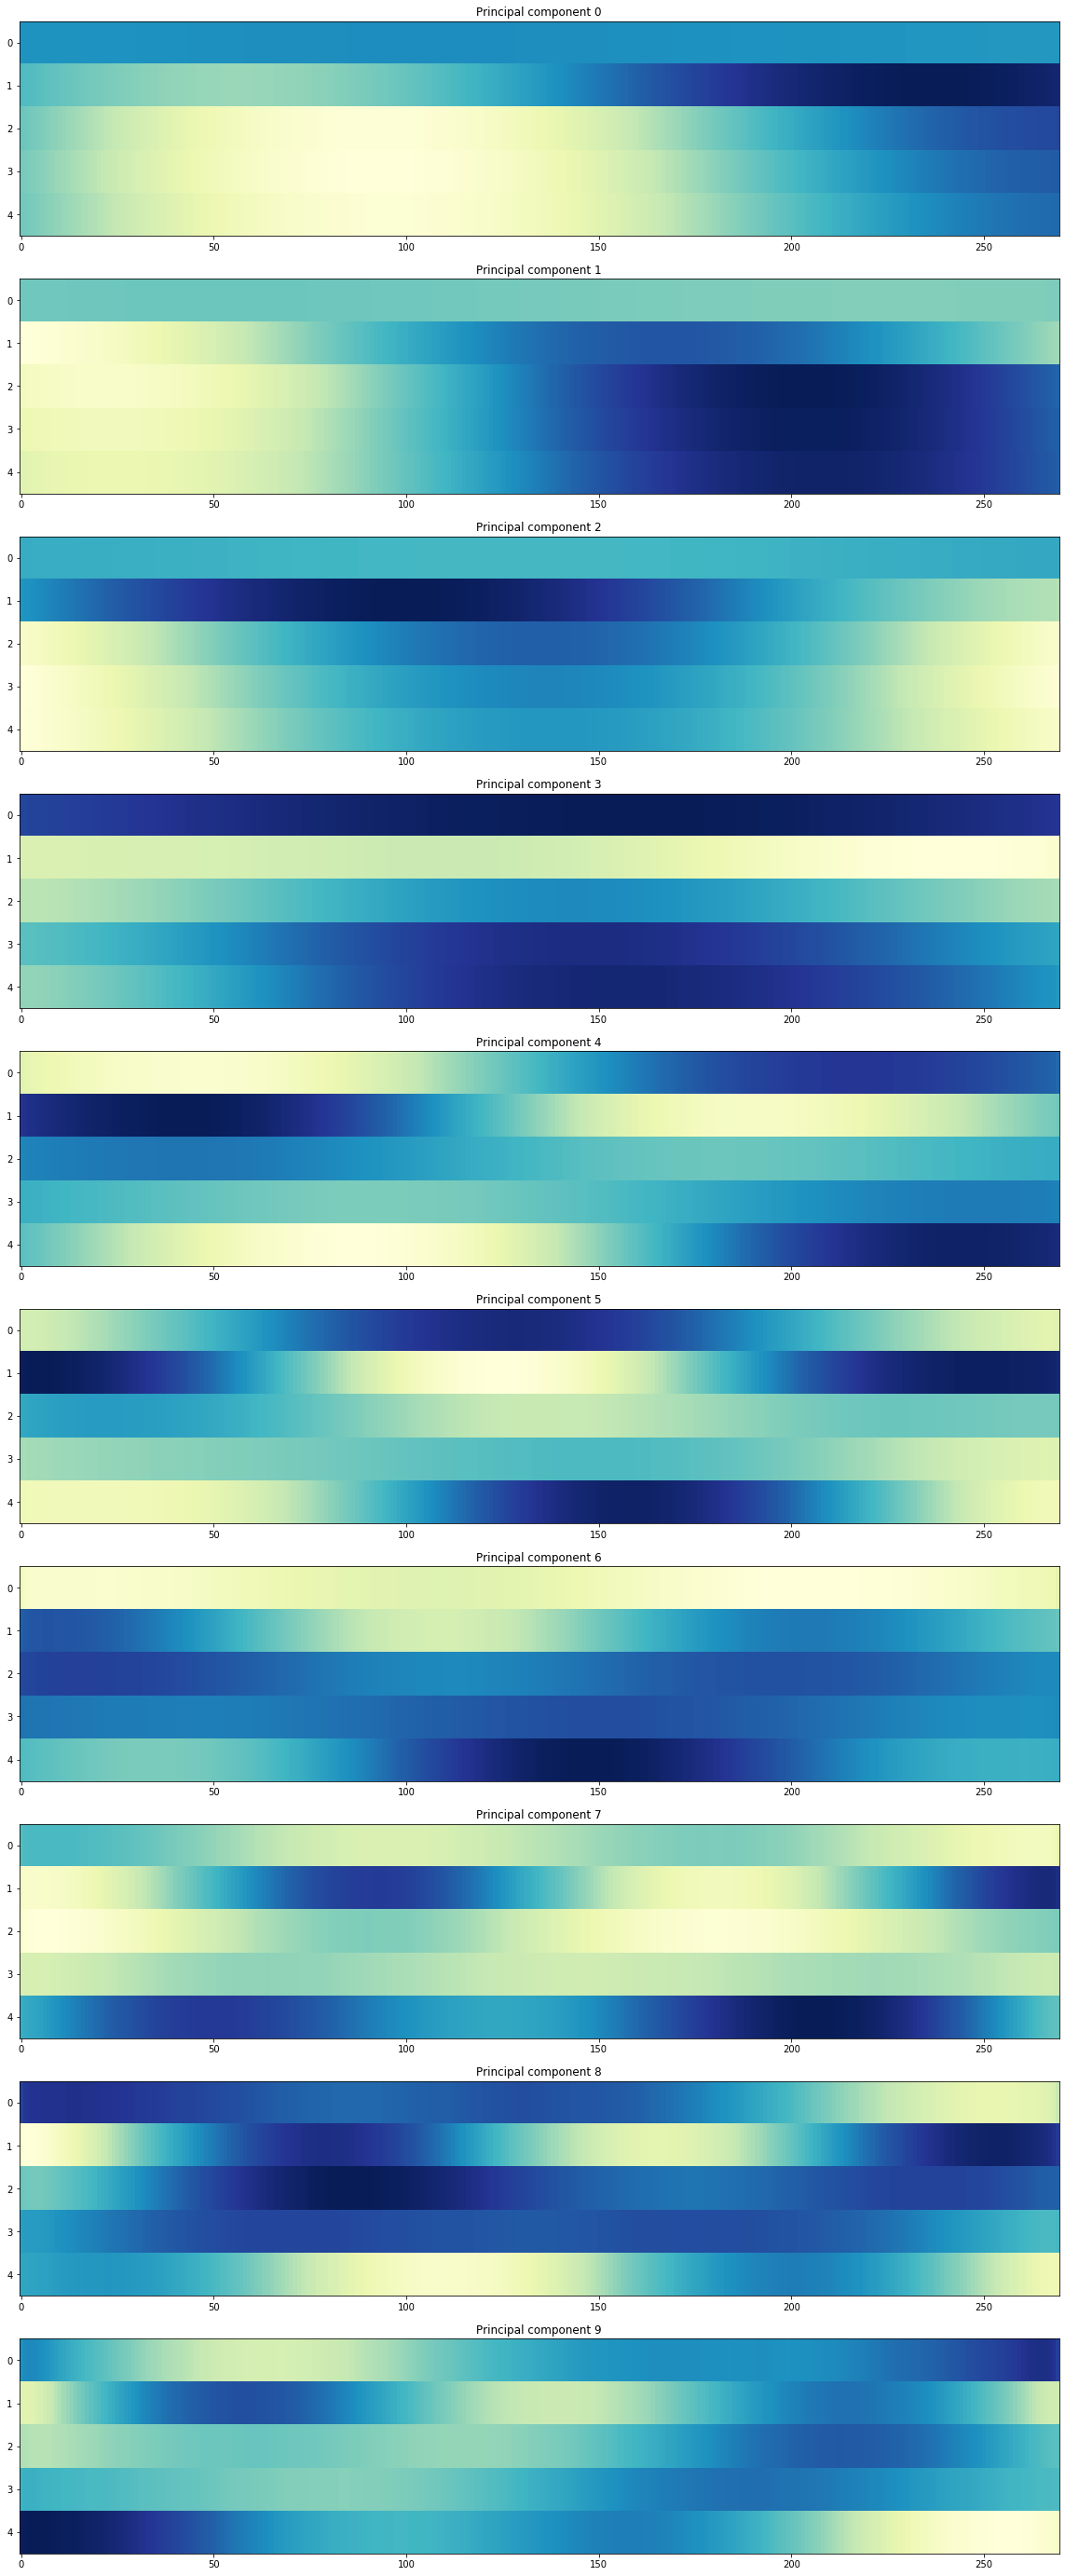

In [36]:
k = 10
plt.rc('figure', figsize=(20,k * 5))
fig, ax = plt.subplots(k, 1)

for i in range(k):
    data = projections[10][:,i].reshape(270, 5).T
#     heatmap = ax[i].pcolor(projections[10].data, cmap=plt.cm.Blues) 
    ax[i].imshow(data, cmap="YlGnBu", aspect="auto")
    ax[i].set_title("Principal component {}".format(i))

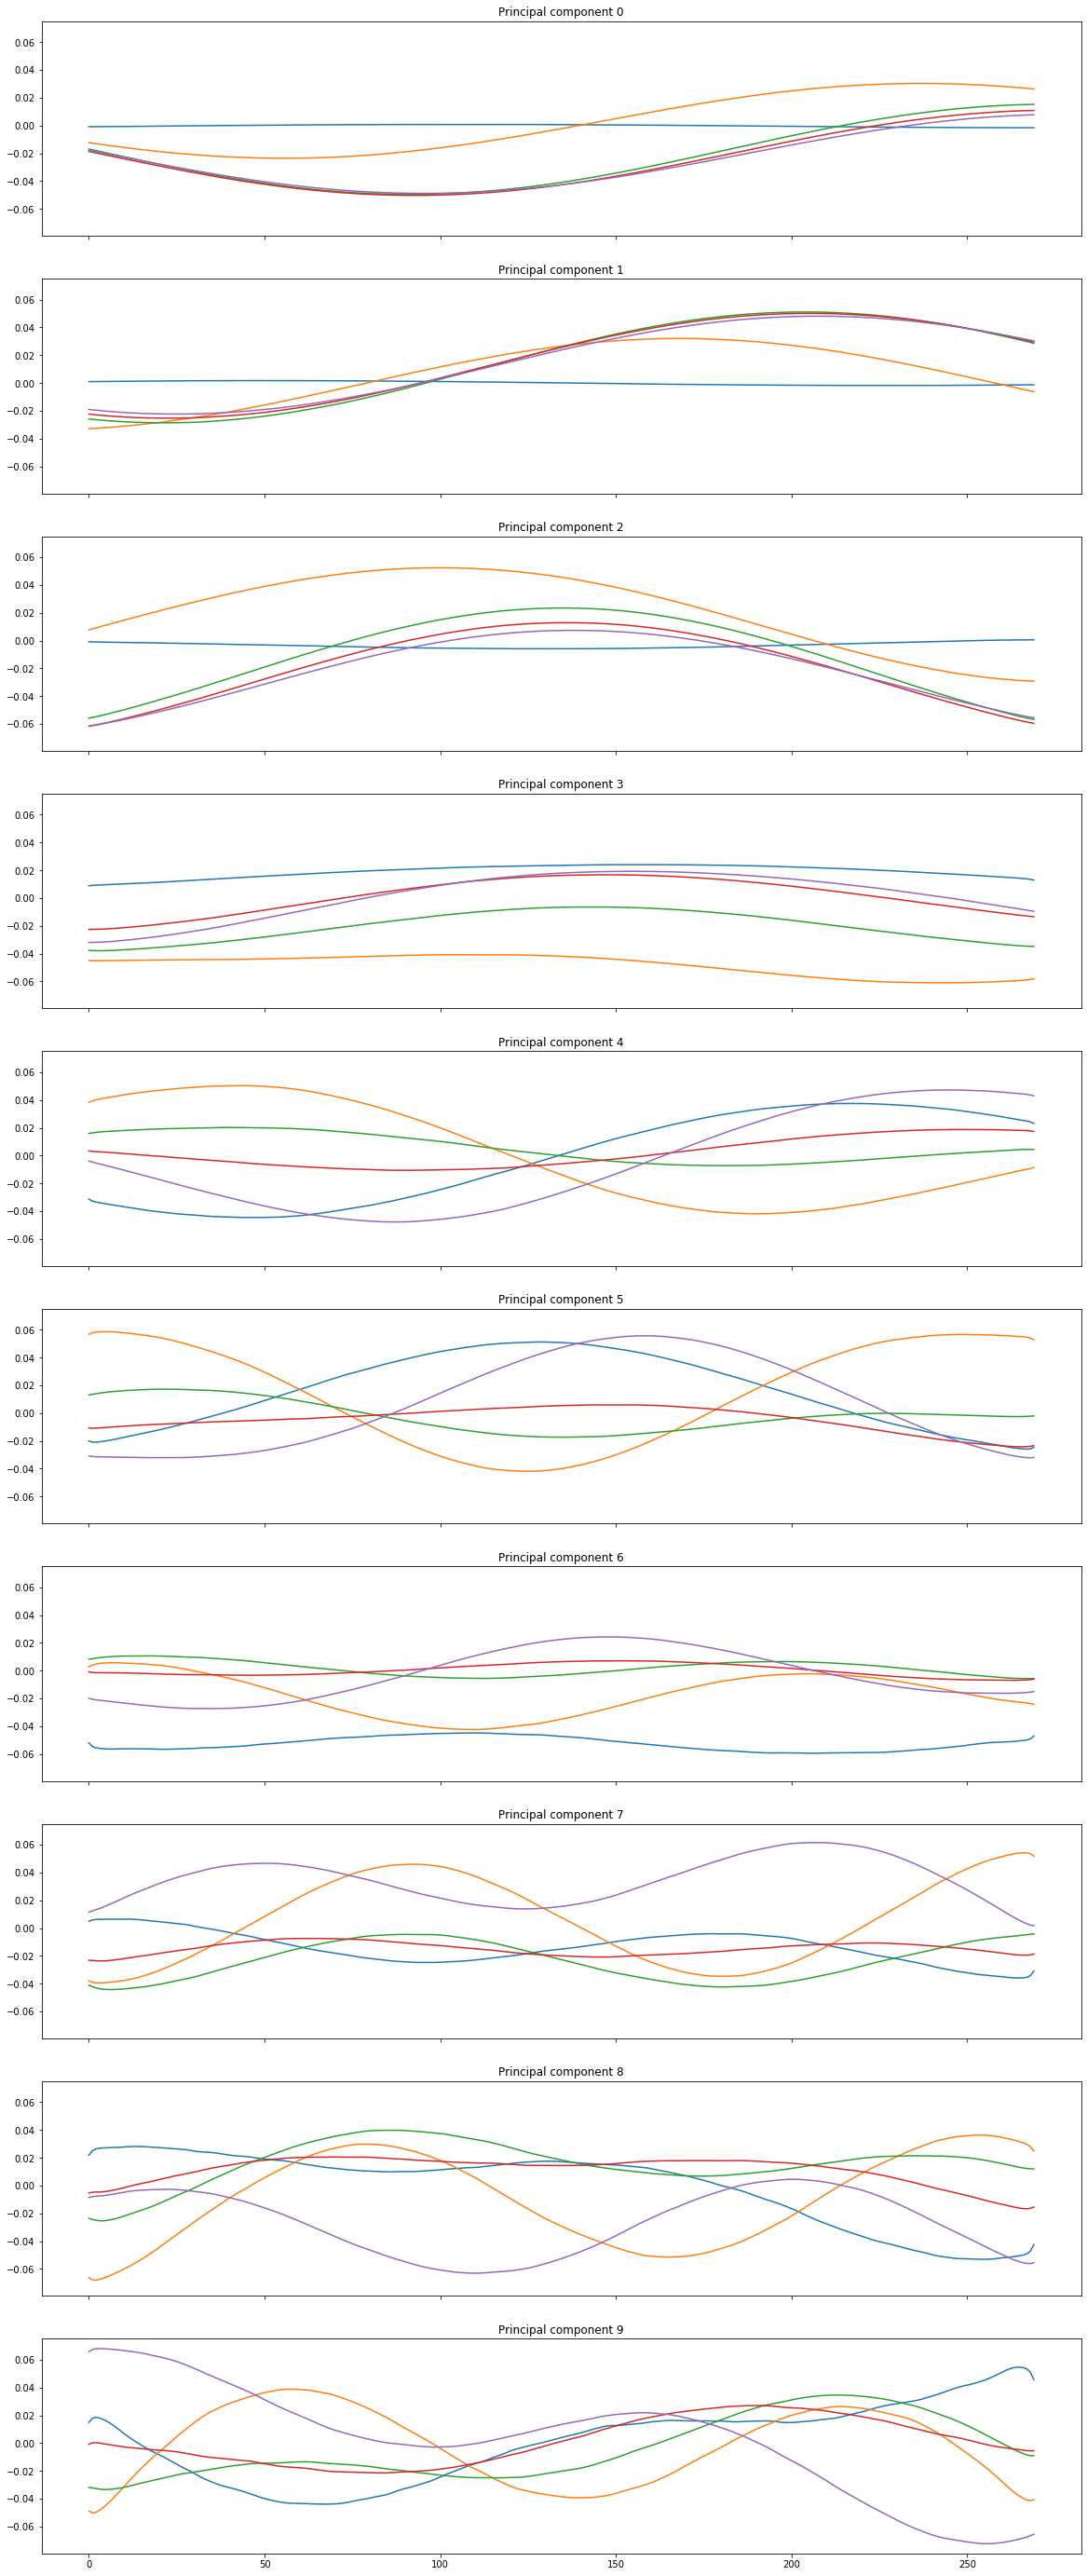

In [37]:
k = 10
plt.rc('figure', figsize=(20,k * 5))
fig, ax = plt.subplots(k, 1, sharex=True, sharey=True)

for i in range(k):
    data = projections[10][:,i].reshape(270, 5)
#     heatmap = ax[i].pcolor(projections[10].data, cmap=plt.cm.Blues) 
    ax[i].plot(data)
    ax[i].set_title("Principal component {}".format(i))